In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import metpy.calc as mpcalc
plt.rcParams.update({'font.size': 28})


In [3]:
directory = '/Users/annaleaalbright/Dropbox/EUREC4A/RadiativeProfiles/Data/'
fp_q = directory + 'ERA5_q_202001_aphe5_025.nc'
fp_ta = directory + 'ERA5_Ta_202001_aphe5_025.nc'
ERA5_q = xr.open_dataset(fp_q)
ERA5_ta = xr.open_dataset(fp_ta)

#%% plot example profiles for circle center

lon_center, lat_center = -57.717,13.3
circle_center_q = ERA5_q.sel(latitude=lat_center, longitude= lon_center, method="nearest")
circle_center_ta = ERA5_ta.sel(latitude=lat_center, longitude= lon_center, method="nearest")

# dims: time=124, level=37
# times: Jan 1, 2020 - Jan 31, 2020; 4x daily: T00, T06, T12, T18 



In [4]:
#%% plot monthly representative profiles in vertical

def plot_example_monthly_profiles(var, var_str, xscale, xlabel):

    pressure = var.level.values # initial pressure profile
    
    if pressure[-1] > pressure[0]:
        var = var.reindex(level=list(reversed(var.level)))
        pressure = var.level.values
        print("first pressure level is", pressure[0])
    else:
        var = var
        pressure = var.level.values
        print("first pressure level is", pressure[0])


    # plot
    plt.figure(figsize=(10,15))
    if var_str == 'q':
        factor = 1000 # convert mixing ratio from kg/kg to g/kg
    else:
        factor = 1
    for i in range(len(var.time)):
        plt.plot(var[var_str].isel(time=i) * factor, pressure, color="lightgrey", linewidth=2,alpha=0.8)
    plt.plot(var[var_str].mean(dim="time") * factor, pressure, linewidth=4, color='black')
    plt.xlabel(xlabel)
    plt.ylabel('pressure / hPa')
    plt.ylim([pressure[0], pressure[-1]])
    plt.grid(True, alpha=0.5)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    if xscale=='log':
        plt.xscale('log')
    else:
        plt.xscale('linear')
    
    return var


first pressure level is 1000.0


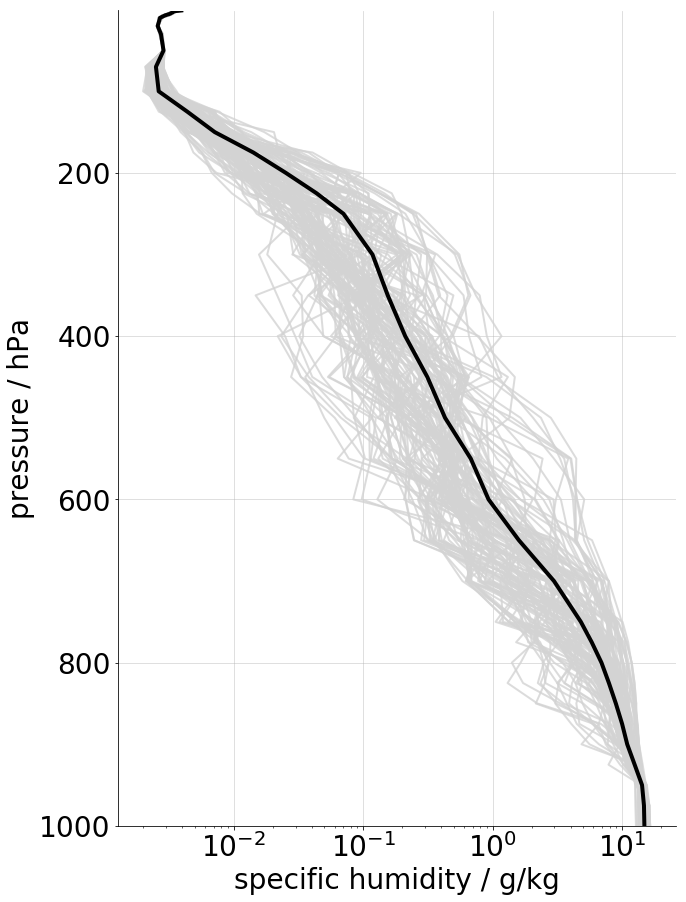

In [5]:
# call function (with values from bottom 1000hPa to top)
circle_center_q = plot_example_monthly_profiles(var = circle_center_q, var_str = 'q', xscale="log", xlabel = 'specific humidity / g/kg')



first pressure level is 1000.0


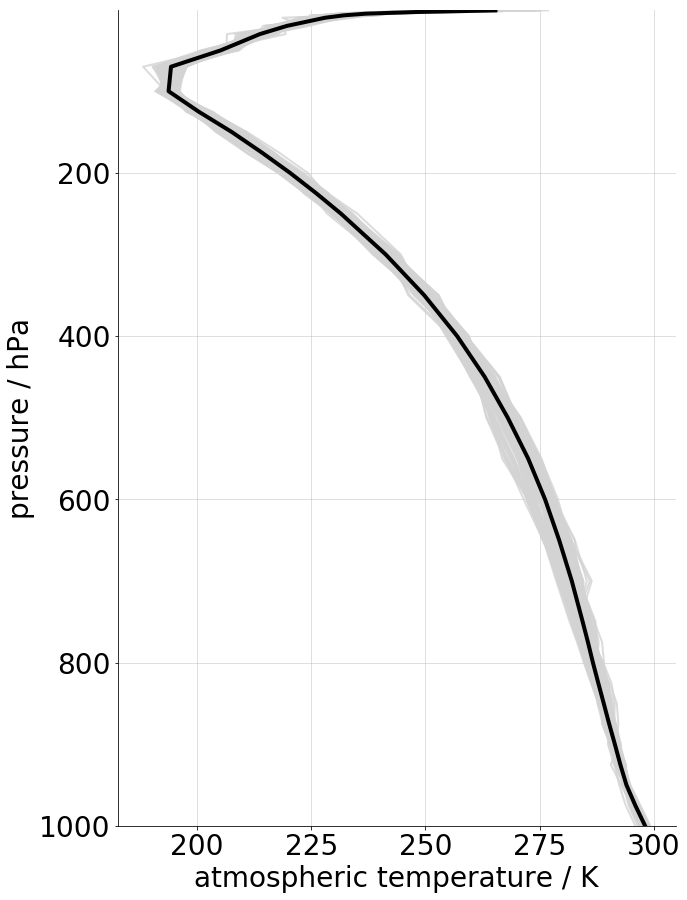

In [6]:
circle_center_ta = plot_example_monthly_profiles(var = circle_center_ta, var_str = 'ta', xscale="linear", xlabel = 'atmospheric temperature / K')

